Logistic Regression实际上是clasification的问题，这时我们数据的输出就是不对一个值的预测，而是输入属于某类class的概率。

模型引入sigmod-function
Loss-function则变成了 BCELoss也就是交叉熵函数。

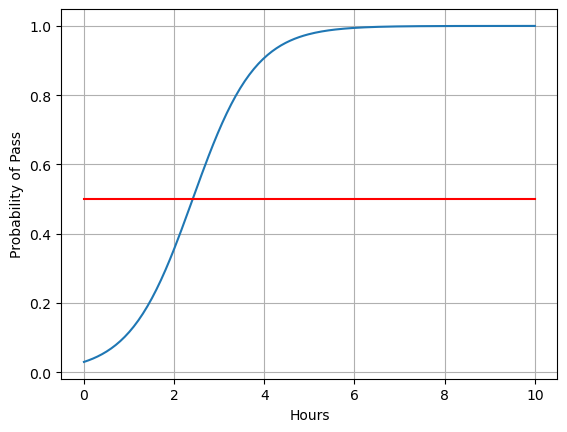

In [24]:
#torch 是 PyTorch 的核心库，用于张量计算和自动求导。
import torch
#numpy 用于数值计算。
import numpy as np
#torch.nn.functional 包含了一些常用的函数，包括激活函数、损失函数等。
import torch.nn.functional as F 
#matplotlib.pyplot 用于绘图。
import matplotlib.pyplot as plt

x_data = torch.tensor([[1.0],[2.0],[3.0]])
y_data = torch.tensor([[0.0],[0.0],[1.0]])

class LogisticRegressionModul(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModul,self).__init__()
        self.linear = torch.nn.Linear(1,1)

    def forward(self,x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred
model = LogisticRegressionModul()

criterion = torch.nn.BCELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)


for epoch in range(1000):
    y_pred = model(x_data)
    loss = criterion(y_pred,y_data)
    #print(epoch,loss.item())

    #清除之前的梯度
    optimizer.zero_grad()
    #反向传播计算梯度
    loss.backward()
    #更新模型参数
    optimizer.step()

#生成从0-10的200个均匀分布的点
x = np.linspace(0,10,200)
#将生成的点转化tensor并变成（200*1）的矩阵
x_t = torch.tensor(x, dtype=torch.float32).view((200, 1)) 
#通过模型计算预测值
y_t = model(x_t)
#将预测值转化为Numpy数组
y = y_t.detach().numpy()


#绘制预测概率曲线
plt.plot(x,y)
#绘制一条水平线，表示通过的概率阈值0.5
#0,10是x轴上的两个点，0.5，0.5是y轴上的两个点，所以是（0，0.5）到（10，0.5）的一条直线
#c=‘r’表示颜色为红色
plt.plot([0,10],[0.5,0.5],c ='r')
#x，y轴标签
plt.xlabel('Hours')
plt.ylabel('Probability of Pass')
#显示网格
plt.grid()
#显示图形
plt.show()